# Titanic Survival Dataset



# Step 0 - library Import

In [1]:

import pandas as pd  #To Import data
import numpy as np   #For Numerical analysis
import matplotlib.pyplot as plt #Data plotting and visualization
import seaborn as sns #For Data visualization

%matplotlib inline

# Step 1 - Import Data

In [2]:
# read the data using pandas dataframe
training_set = pd.read_csv('Train_Titanic.csv')

In [3]:
training_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training_set.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Step 2 - Data Analysis and visualization

Calculate No of survivors and non survivors

In [5]:

#Total Population
Total = training_set['Survived'].count()
#Those who survived
survived = training_set[training_set['Survived'] == 1]['Survived'].count()
#Those who dint survive
didnotsurvive = training_set[training_set['Survived'] == 0]['Survived'].count()


Display General Stats

In [6]:
print('Total People on Ship              =', training_set['Survived'].count())
print('People who Survived               =', survived)
print('People who did not survive        =',didnotsurvive)
print('Percentage of people who survived =',round(100 * survived/ Total , 2), '%')
print('Percentage of people who died     =',round(100 * didnotsurvive/ Total, 2), '%')

Total People on Ship              = 891
People who Survived               = 342
People who did not survive        = 549
Percentage of people who survived = 38.38 %
Percentage of people who died     = 61.62 %


### General Discriptive Statistics:

No of people in class 1   = 216
No of people in class 2   = 184
No of people in class 3   = 491


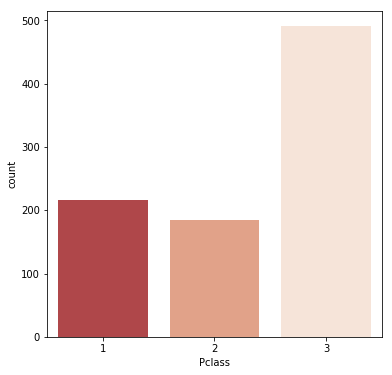

In [7]:
# Bar Chart to indicate the number of people in Ship based on their class
plt.figure(figsize=[6,6])
sns.countplot(x = training_set['Pclass'] , palette = sns.color_palette("RdBu", n_colors=6) )
print('No of people in class 1   =' , len(training_set[training_set['Pclass'] == 1]))
print('No of people in class 2   =', len(training_set[training_set['Pclass'] == 2]))
print('No of people in class 3   =', len(training_set[training_set['Pclass'] == 3]))


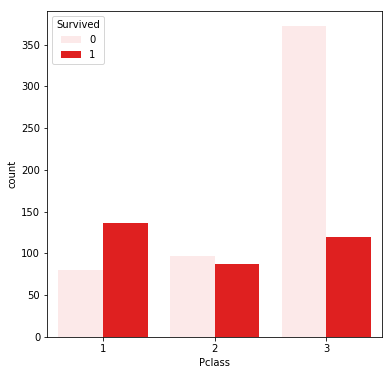

In [8]:
# Bar Chart to indicate the number of people survived based on their class
#1st Class people better chance of survival
#3rd class people the least chance of survival
plt.figure(figsize=[6,6])
sns.countplot(x = 'Pclass', hue = 'Survived', data=training_set, color = 'red')

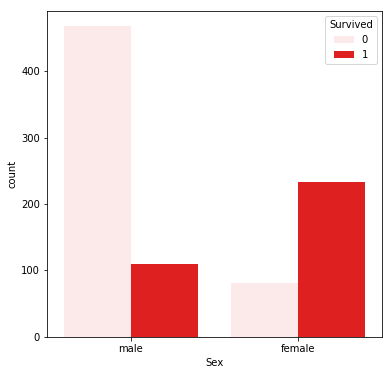

In [9]:
#Female have better chance to survive than male.
plt.figure(figsize=[6,6])
sns.countplot(x = 'Sex', hue = 'Survived', data=training_set , color = 'red')

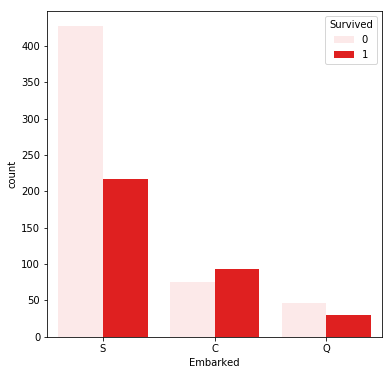

In [10]:
plt.figure(figsize=[6,6])
sns.countplot(x = 'Embarked', hue = 'Survived', data=training_set , color = 'red')

In [ ]:
# Bar Chart to indicate the number of people survived based on their age
# If you are a baby, you have a higher chance of survival

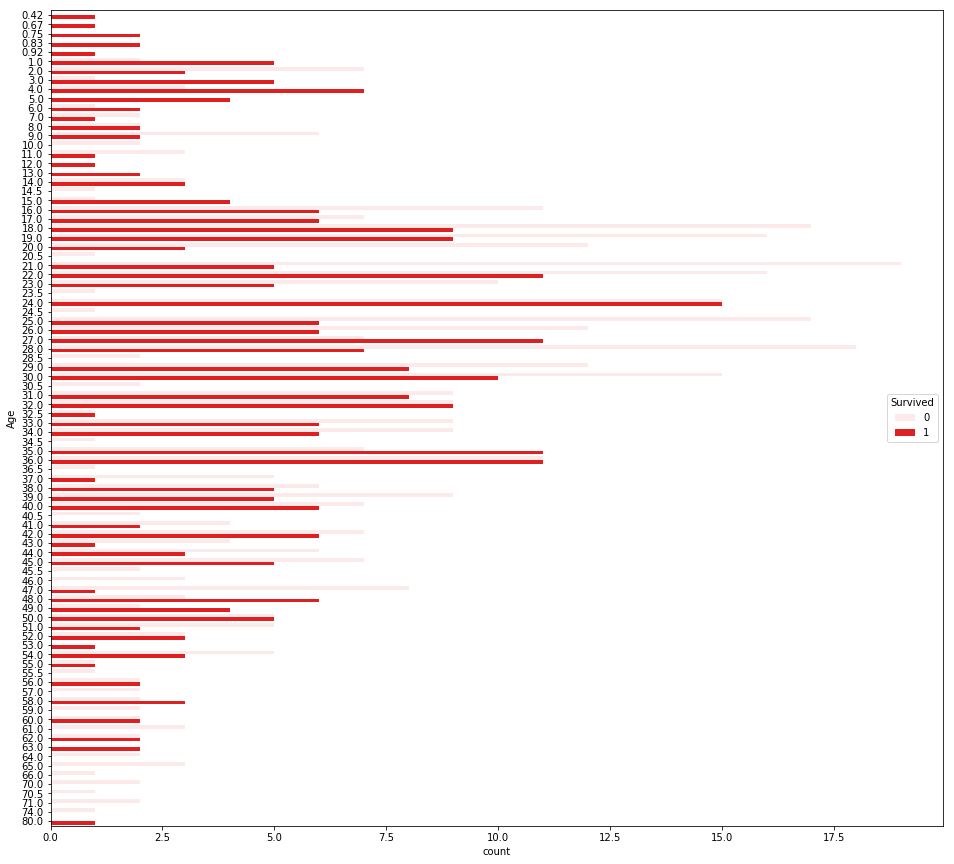

In [11]:
plt.figure(figsize=[16,15])
sns.countplot(y = 'Age', hue = 'Survived', data=training_set ,  color = 'red')


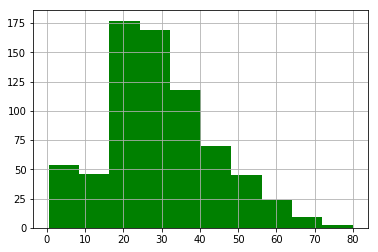

In [12]:
# Age Histogram 
training_set['Age'].hist(bins = 10 , color = 'green')

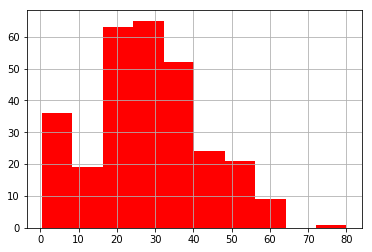

In [13]:
# Age Histogram of those who dint survive
training_set[training_set['Survived']==1]['Age'].hist(bins = 10 , color = 'red')

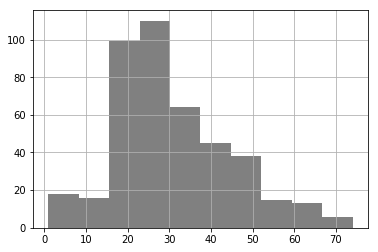

In [14]:
# Age Histogram of those who survived
training_set[training_set['Survived']==0]['Age'].hist(bins = 10 , color = 'grey')

# Step 3 - Data Cleaning

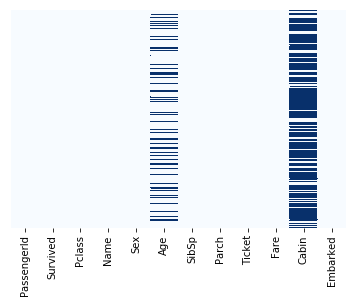

In [15]:
# Find Missing Data using Heat Map
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

Age and Cabin columns seems to have quite a lot of missing values.
Age is and Important Column but Cabin does not seem very Important, thus can be remooved

In [16]:
#Drop unnecessary Columns
training_set.drop(['Name', 'Ticket', 'PassengerId' ,  'Cabin'],axis=1,inplace=True)


In [17]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


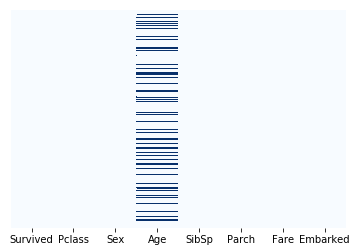

In [18]:
# Find Missing Data again again
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [19]:
#Find Average age of Male and female members in the ship
tot_avg_age = training_set['Age'].mean()
male_avg_age = training_set[training_set['Sex'] =='male']['Age'].mean()
female_avg_age = training_set[training_set['Sex'] =='female']['Age'].mean()
print("male avg age = " , round(male_avg_age, 2))
print("female avg age = " , round(female_avg_age, 2))

male avg age =  30.73
female avg age =  27.92


In [20]:
training_set["Age"].fillna(training_set.groupby("Sex")["Age"].transform("mean"), inplace=True)

In [21]:
#Delete the extra row after creating Dummy variables
male = pd.get_dummies(training_set['Sex'], drop_first = True)


In [22]:
#  Add the encoded column male to the dataset
training_set = pd.concat([training_set, male], axis=1)

In [23]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [24]:
#Delete the extra column in Embarked after creating variables
emb_dumm = pd.get_dummies(training_set['Embarked'], drop_first = True)


In [25]:
emb_dumm.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
#Add the encoded column male to the dataset
training_set = pd.concat([training_set, emb_dumm], axis=1)

In [27]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [28]:
#Drop the SEX and Embarked columns from the main dataset as it is no longer required
training_set.drop(['Sex', 'Embarked'], axis=1, inplace=True)

# Step4 - Model Building

##Model Training

In [29]:
#Drop the target coloumn before we do train test split
X = training_set.drop('Survived',axis=1).values
y = training_set['Survived'].values


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [32]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Model Testing

In [33]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [34]:
y_test

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

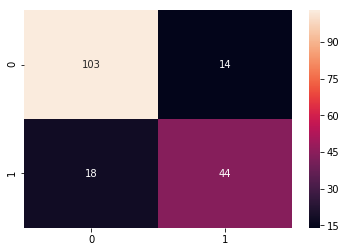

In [35]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True , fmt="d")

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

             precision    recall  f1-score   support

          0       0.85      0.88      0.87       117
          1       0.76      0.71      0.73        62

avg / total       0.82      0.82      0.82       179



Overall We can see that the model has quite accurately predicted the survival and death numbersin Titanic